# Notebook to compare and rank options

This webtool uses Multi-criteria decision analysis to rank the ARchitecture firms listed in WA100 2023 by Building Design Journal [https://www.bdonline.co.uk/wa100-2023-the-big-list/5121420.article]

The comparison method choosen here is TOPSIS which can compare values of different units. [https://scikit-criteria.quatrope.org/en/latest/tutorial/quickstart.html]

In [5]:
import skcriteria as skc
import ipywidgets as widgets
from ipywidgets import interact, interactive, fixed, interact_manual
from skcriteria.madm import similarity  # here lives TOPSIS
from skcriteria.pipeline import mkpipe  # this function is for create pipelines
from skcriteria.preprocessing import invert_objectives, scalers
from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual,Output
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib as mtplt
from IPython.display import display
from sklearn import preprocessing
from matplotlib.colors import LinearSegmentedColormap

In [6]:
pipe = mkpipe(
    invert_objectives.NegateMinimize(),
    scalers.VectorScaler(target="matrix"),  # this scaler transform the matrix
    scalers.SumScaler(target="weights"),  # and this transform the weights
    similarity.TOPSIS(),
)

In [7]:
# Define your custom colors
ram_1 = '#273943' 
ram_2 = '#62294B' 
ram_3= '#05326E'
ram_4='#125A40'
ram_5= '#ADD095'
ram_6= '#E3E1D8'
colors = [ram_1,ram_2,ram_3,ram_4,ram_5,ram_6]
# Create a LinearSegmentedColormap
custom_cmap = LinearSegmentedColormap.from_list('custom_colormap', colors, N=256)

## Criteria and base data  

Each criteria was given a score from (0-10) based on the research from the Top 100 Architects for 2023 list published by BD Online. Regional filters have been added to filter the data as well.
1. **BD Rank 2023:** Rank as per the database. Firms that are not listed on the Journal have 100 as their Ranking 
2. **International Portfolio:** Website research ( Scoring between the listed firms ) 
3. **Complex Projects:** Complexity in terms of scale and geometry ( Scoring between the listed firms ) 
4. **High Rise Buildings:** Highrise as defined by CTBUH ( Percentage of highrise jobs ) 
5. **Current Relationship:** (Currently no Data is added for this criteria) 
6. **Align with Values:** Check if the ideas promoted by the company align with our corporate values
7. **Architects employed:** The number of Architects in the company as per the database
8. **Turnover:** Scoring between listed firms in USD Million
9. **Locations:** Number of locations from where they operate out of ( Scoring between the listed firms ) 

In [8]:
Base_Data= pd.read_csv("Pandas_Data_frame_09022024.csv")

In [9]:
archi_list=Base_Data["Architect"].to_numpy()

In [10]:
objectives = [min,max,max,max,max,max,max,max,max]

In [11]:
criteria_1 =["BD Rank 2023", "International Portfolio","Complex projects","Highrise buildings", "Current relationship", "Align with values","Architects employed","Turnover","Locations"]

layout = widgets.Layout(width='auto', height='auto') #set width and height
style = {'description_width': 'initial'} # Display full text

In [12]:
def criteria_slider(name):
    criteria_slider=widgets.IntSlider(   
    value=5,
    min=0,
    max=10,
    step=1,
    description=str(name),
    style = {'description_width': 'initial'},
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='d')
    return criteria_slider

In [13]:
def selection_dropdown():
    selection_dropdown=widgets.Dropdown(
        options=[('UK Presence', 1), ('DK Presence', 2),('NO Presence', 3),('DE Presence', 4),('UAE Presence', 5),('SG Presence', 6),('US Presence', 7) ],
        value=1,
        description='Selection Criteria:',
        style= {'description_width': 'initial'}
    )
    return selection_dropdown


In [14]:
selection_dropdown_2=widgets.Dropdown(
options=[('UK Presence', 1), ('DK Presence', 2),('NO Presence', 3),('DE Presence', 4),('UAE Presence', 5),('SG Presence', 6),('US Presence', 7) ],
value=1,
description='Selection Criteria:',
style= {'description_width': 'initial'}
)

## Vizualise the base data

The scores given for the various categories are displayed in this heat plot. The weighting for each category done later and will be applied to these scores. Heat plots for each geography is displayed in seperate tabs below. The values are normalised w.r.t to the maximum value in the category.

In [35]:
def plotdm (j,xdim,ydim):
    if j == 1 :
        x= Base_Data.loc[Base_Data['UK Presence'] ==1]
    elif j == 2:
        x= Base_Data.loc[Base_Data['DK Presence'] == 1]
    elif j == 3:
        x= Base_Data.loc[Base_Data['NO Presence'] == 1]
    elif j == 4:
        x= Base_Data.loc[Base_Data['DE Presence'] == 1]
    elif j == 5:
        x= Base_Data.loc[Base_Data['UAE Presence'] == 1]
    elif j == 6:
        x= Base_Data.loc[Base_Data['SG Presence'] == 1]
    elif j == 7:
        x= Base_Data.loc[Base_Data['US Presence'] == 1]
    
    droped_data= x.drop(x.columns[0:9],axis=1)
    droped_data_last= droped_data.drop(droped_data.columns[9],axis=1)
    data_matrix= droped_data_last.to_numpy()
    data_matrix[:, 0]= 100 - data_matrix[:, 0]
    data_matrix_normalized = preprocessing.normalize(data_matrix,axis=0,norm="max")
    
    y=x["Architect"].to_numpy()

    dm = skc.mkdm(
    data_matrix_normalized,
    objectives,
    weights=[0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5],
    alternatives=y,
    criteria= criteria_1
    )
    fig=plt.figure(figsize=(xdim,ydim), dpi= 100, facecolor='w', edgecolor='k')
    return dm

## UK Heat plot (United Kingdom)

<Axes: xlabel='Criteria', ylabel='Alternatives'>

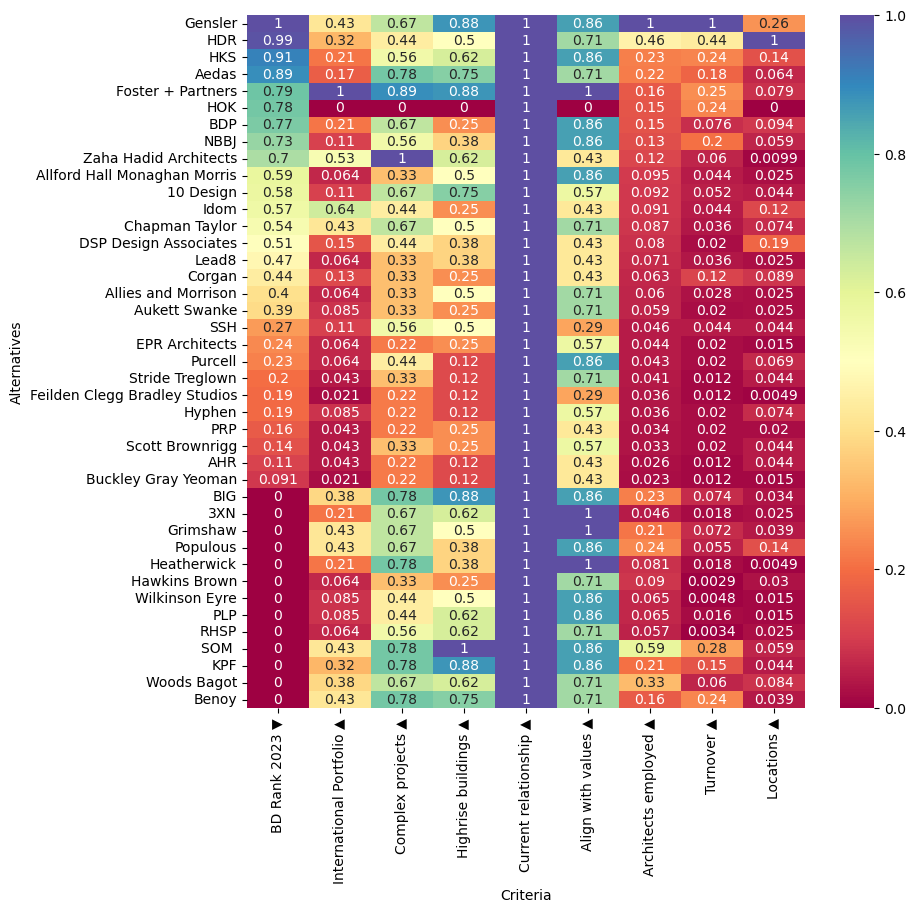

In [50]:
plotdm(1,9,9).plot(cmap='Spectral')

## DK Heat plot (Denmark)

<Axes: xlabel='Criteria', ylabel='Alternatives'>

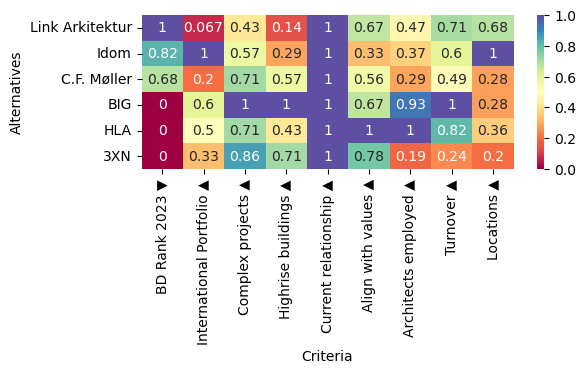

In [65]:
plotdm(2,6,2).plot(cmap='Spectral')

## NO Heat plot (Norway)

<Axes: xlabel='Criteria', ylabel='Alternatives'>

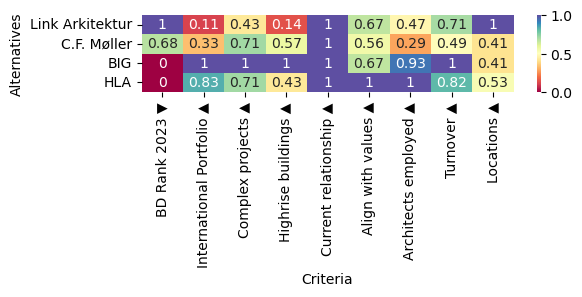

In [68]:
plotdm(3,6,1).plot(cmap='Spectral')

## DE Heat plot (Germany)

<Axes: xlabel='Criteria', ylabel='Alternatives'>

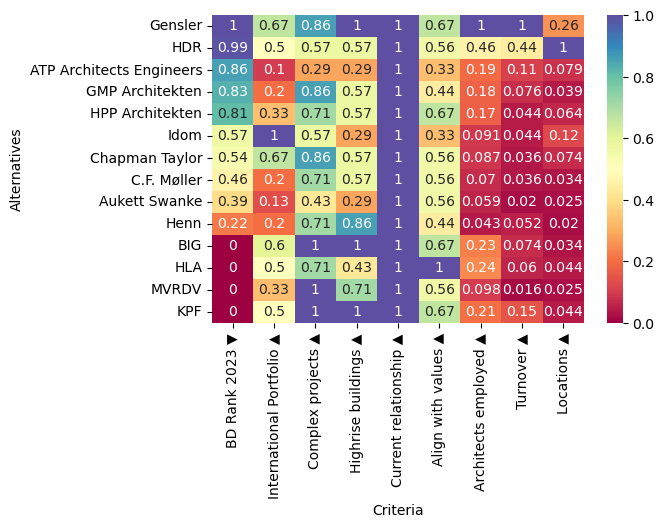

In [67]:
plotdm(4,6,4).plot(cmap='Spectral')

## UAE Heat plot (Dubai)

<Axes: xlabel='Criteria', ylabel='Alternatives'>

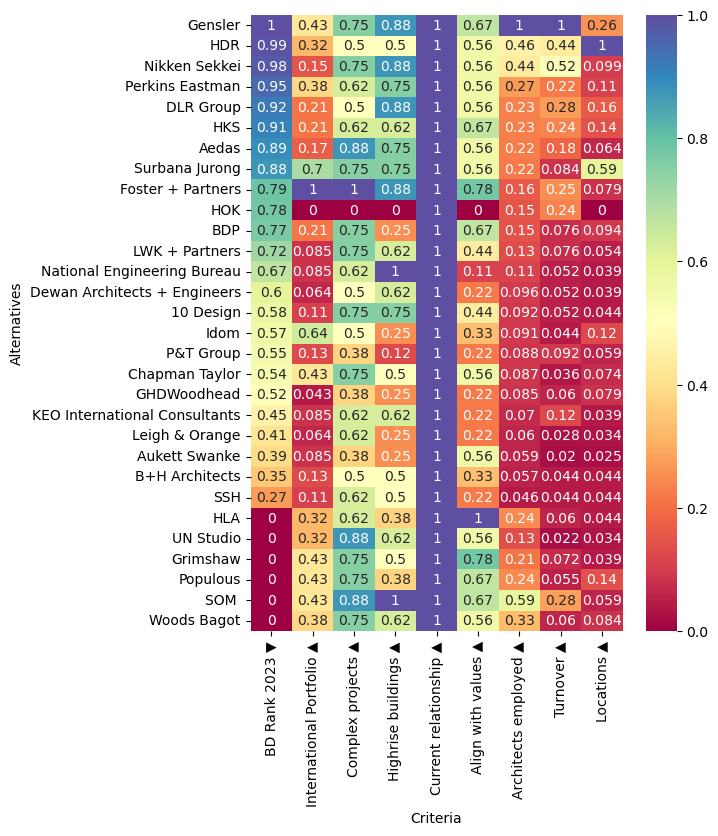

In [59]:
plotdm(5,6,8).plot(cmap='Spectral')

## SG Heat plot (Singapore)

<Axes: xlabel='Criteria', ylabel='Alternatives'>

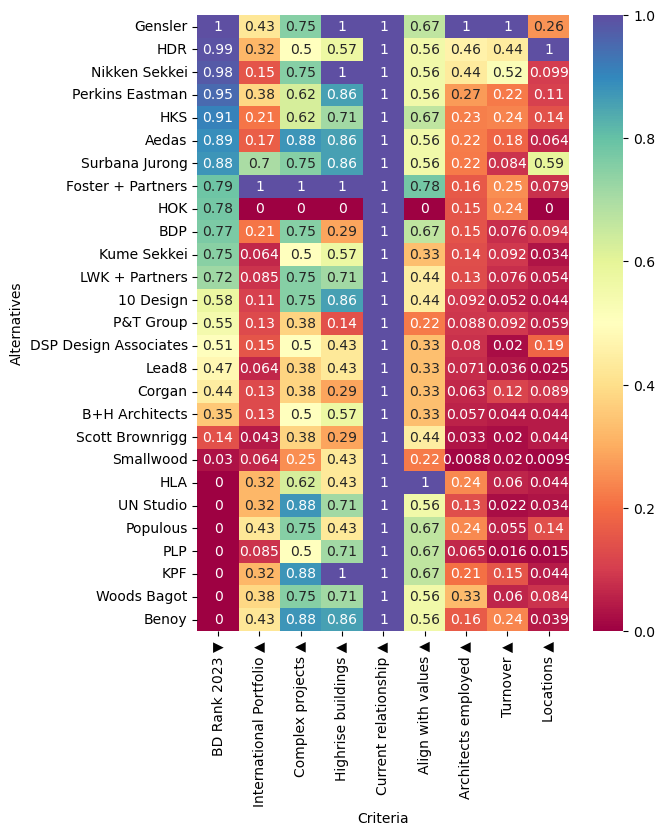

In [60]:
plotdm(6,6,8).plot(cmap='Spectral')

## US Heat plot (United States of America)

<Axes: xlabel='Criteria', ylabel='Alternatives'>

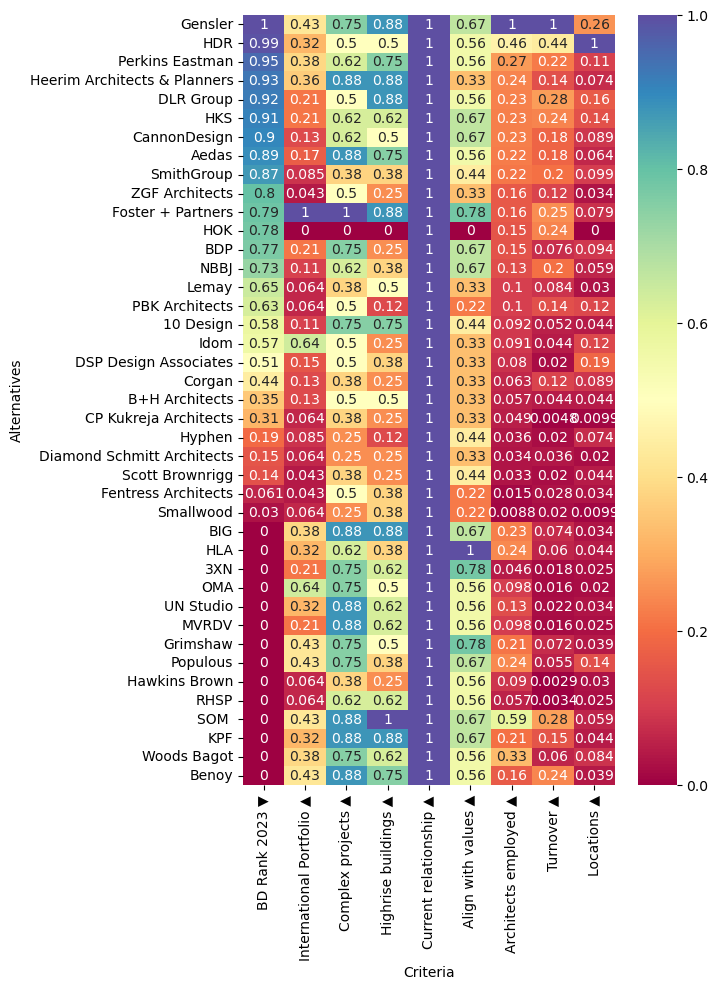

In [63]:
plotdm(7,6,10).plot(cmap='Spectral')

## Adjust the sliders as per preference and view the Rankings

Adjust the sliders to create a decision matrix and view the results accordingly
Select the filter before assining the values to the criteria

In [12]:
@interact(a=criteria_slider(criteria_1[0]),
 b=criteria_slider(criteria_1[1]),
 c=criteria_slider(criteria_1[2]),
 d=criteria_slider(criteria_1[3]),
 e=criteria_slider(criteria_1[4]),
 f=criteria_slider(criteria_1[5]),
 g=criteria_slider(criteria_1[6]),
 h=criteria_slider(criteria_1[7]),
 i=criteria_slider(criteria_1[8]),
        j=selection_dropdown())

def g(j,a,b,c,d,e,f,g,h,i):
    
    if j == 1 :
        x= Base_Data.loc[Base_Data['UK Presence'] ==1]
    elif j == 2:
        x= Base_Data.loc[Base_Data['DK Presence'] == 1]
    elif j == 3:
        x= Base_Data.loc[Base_Data['NO Presence'] == 1]
    elif j == 4:
        x= Base_Data.loc[Base_Data['DE Presence'] == 1]
    elif j == 5:
        x= Base_Data.loc[Base_Data['UAE Presence'] == 1]
    elif j == 6:
        x= Base_Data.loc[Base_Data['SG Presence'] == 1]
    elif j == 7:
        x= Base_Data.loc[Base_Data['US Presence'] == 1]
    
    droped_data= x.drop(x.columns[0:9],axis=1)
    droped_data_last= droped_data.drop(droped_data.columns[9],axis=1)
    data_matrix= droped_data_last.to_numpy()
    y=x["Architect"].to_numpy()
    
    dm_2 = skc.mkdm(
    data_matrix,
    objectives,
    weights=[a/10,b/10,c/10,d/10,e/10,f/10,g/10,h/1,i/1],
    alternatives=y,
    criteria= criteria_1
    )
    rank = pipe.evaluate(dm_2)
    Ranking_table =  pd.DataFrame({
    'Architects': rank.alternatives,
    'Rank': rank.rank_
    })
    sorted_ranks= Ranking_table.sort_values(by=['Rank'])

    return sorted_ranks.style.hide()

interactive(children=(Dropdown(description='Selection Criteria:', options=(('UK Presence', 1), ('DK Presence',…

# Comparison of all Firms on the List 

Heat map for all the firms listed in the database 

<Axes: xlabel='Criteria', ylabel='Alternatives'>

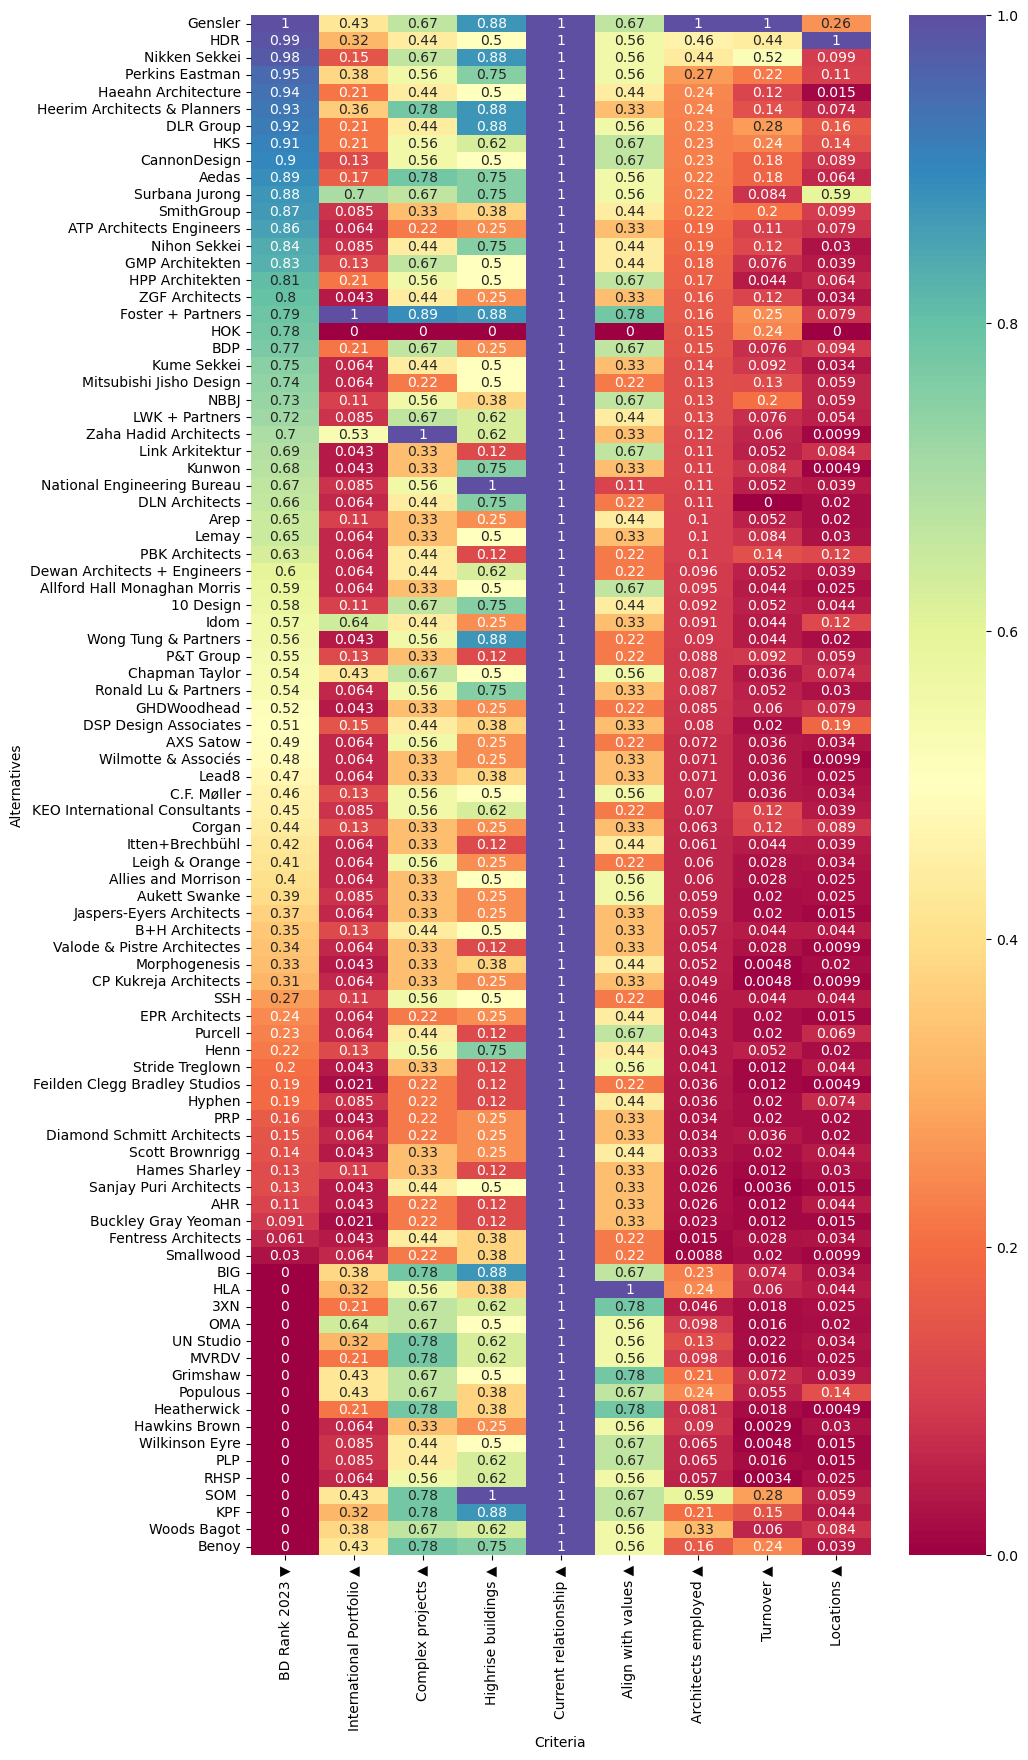

In [71]:
droped_data_2= Base_Data.drop(Base_Data.columns[0:9],axis=1)
droped_data_last_all= droped_data_2.drop(droped_data_2.columns[9],axis=1)
data_matrix_all= droped_data_last_all.to_numpy()
data_matrix_all[:, 0]= 100 - data_matrix_all[:, 0]
data_matrix_normalized_all = preprocessing.normalize(data_matrix_all,axis=0,norm="max")

y=Base_Data["Architect"].to_numpy()

dm_all = skc.mkdm(
data_matrix_normalized_all,
objectives,
weights=[0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5],
alternatives=y,
criteria= criteria_1
    )
fig=plt.figure(figsize=(10,20), dpi= 100, facecolor='w', edgecolor='k')
dm_all.plot(cmap="Spectral")

## Adjust the sliders as per preference and view the Rankings
Ranking comparison for all the firms listed in the database 

In [64]:
@interact(a=criteria_slider(criteria_1[0]),
 b=criteria_slider(criteria_1[1]),
 c=criteria_slider(criteria_1[2]),
 d=criteria_slider(criteria_1[3]),
 e=criteria_slider(criteria_1[4]),
 f=criteria_slider(criteria_1[5]),
 g=criteria_slider(criteria_1[6]),
 h=criteria_slider(criteria_1[7]),
 i=criteria_slider(criteria_1[8]),
       )

def g(a,b,c,d,e,f,g,h,i):
    
    droped_data_all= Base_Data.drop(Base_Data.columns[0:9],axis=1)
    droped_data_last_all= droped_data_all.drop(droped_data_all.columns[9],axis=1)
    data_matrix_all_2= droped_data_last_all.to_numpy()
    archi_list=Base_Data["Architect"].to_numpy()
    
    dm_3 = skc.mkdm(
    data_matrix_all_2,
    objectives,
    weights=[a/10,b/10,c/10,d/10,e/10,f/10,g/10,h/1,i/1],
    alternatives=archi_list,
    criteria= criteria_1
    )
    rank = pipe.evaluate(dm_3)
    Ranking_table =  pd.DataFrame({
    'Architects': rank.alternatives,
    'Rank': rank.rank_
    })
    sorted_ranks= Ranking_table.sort_values(by=['Rank'])

    return sorted_ranks.style.hide()

interactive(children=(IntSlider(value=5, continuous_update=False, description='BD Rank 2023', max=10, style=Sl…